In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
dataset = pd.read_csv('C:/Users/vampi/Downloads/Credit_Card_Applications.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:-1].values

In [38]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

## Training our Self organizing maps

In [39]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

## Visualize results...

In [40]:
som.random_weights_init(X)

In [41]:
som.train_random(data=X, num_iteration=100)

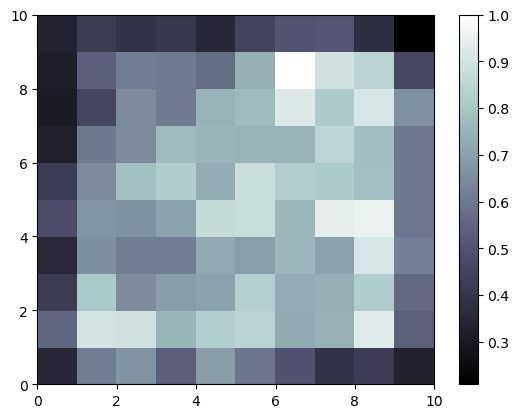

In [42]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 'a']
colors = ['r', 'g']
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(2,8)]), axis=0)
frauds = sc.inverse_transform(frauds)
# The white centres are potential frauds and outliers as they are closer to 1

## Now let us couple it Up with an amazing ANN model and point out the frauds 

In [43]:
customers = dataset.iloc[:,1:]
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units=2, activation='relu', input_dim=15))
classifier.add(Dense(units=2, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(customers, is_fraud, batch_size=1, epochs=2)

Epoch 1/2


D:\Conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9770 - loss: 0.4290
Epoch 2/2
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9724 - loss: 0.2055


In [47]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1], y_pred), axis=1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[1.57901130e+07, 8.48319726e-09],
       [1.57723290e+07, 4.05082857e-04],
       [1.56366260e+07, 9.23245680e-04],
       ...,
       [1.56316930e+07, 2.04249337e-01],
       [1.56675880e+07, 2.04249337e-01],
       [1.55924120e+07, 2.04249337e-01]])

## It is  time to arrange the IDs and concat it with chances of frauds in descending order so that potential frauds can be pin pointed.

In [ ]:
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)
y_pred = y_pred[y_pred[:, 1].argsort()]
y_pred # this outputs the columns of id and chances concatenated.